<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Préparation-de-l'espace-de-travail" data-toc-modified-id="Préparation-de-l'espace-de-travail-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Préparation de l'espace de travail</a></span></li><li><span><a href="#Authentification-du-client" data-toc-modified-id="Authentification-du-client-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Authentification du client</a></span></li><li><span><a href="#Création-de-l'application-LUIS" data-toc-modified-id="Création-de-l'application-LUIS-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Création de l'application LUIS</a></span></li><li><span><a href="#Chargement-des-données" data-toc-modified-id="Chargement-des-données-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Chargement des données</a></span></li><li><span><a href="#Transformation-des-données" data-toc-modified-id="Transformation-des-données-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Transformation des données</a></span></li><li><span><a href="#Création-des-entités" data-toc-modified-id="Création-des-entités-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Création des entités</a></span></li><li><span><a href="#Création-de-l'intention-pour-l'application" data-toc-modified-id="Création-de-l'intention-pour-l'application-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Création de l'intention pour l'application</a></span></li><li><span><a href="#Entraînement-du-modèle" data-toc-modified-id="Entraînement-du-modèle-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Entraînement du modèle</a></span><ul class="toc-item"><li><span><a href="#Découpage-set-entrainement-/-set-test" data-toc-modified-id="Découpage-set-entrainement-/-set-test-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Découpage set entrainement / set test</a></span></li><li><span><a href="#Chargement-des-phrases-d'exemples-et-entraînement-de-l'application" data-toc-modified-id="Chargement-des-phrases-d'exemples-et-entraînement-de-l'application-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Chargement des phrases d'exemples et entraînement de l'application</a></span></li><li><span><a href="#Récupération-du-point-de-terminaison" data-toc-modified-id="Récupération-du-point-de-terminaison-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Récupération du point de terminaison</a></span></li></ul></li><li><span><a href="#Test-du-modèle" data-toc-modified-id="Test-du-modèle-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Test du modèle</a></span><ul class="toc-item"><li><span><a href="#Test-pour-une-phrase" data-toc-modified-id="Test-pour-une-phrase-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Test pour une phrase</a></span></li><li><span><a href="#Evaluation-avec-le-jeu-de-données-test" data-toc-modified-id="Evaluation-avec-le-jeu-de-données-test-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Evaluation avec le jeu de données test</a></span><ul class="toc-item"><li><span><a href="#Capacité-du-modèle-à-prédire-la-bonne-intention" data-toc-modified-id="Capacité-du-modèle-à-prédire-la-bonne-intention-9.2.1"><span class="toc-item-num">9.2.1&nbsp;&nbsp;</span>Capacité du modèle à prédire la bonne intention</a></span></li><li><span><a href="#Capacité-du-modèle-à-prédire-les-bonnes-entités" data-toc-modified-id="Capacité-du-modèle-à-prédire-les-bonnes-entités-9.2.2"><span class="toc-item-num">9.2.2&nbsp;&nbsp;</span>Capacité du modèle à prédire les bonnes entités</a></span></li></ul></li></ul></li></ul></div>

Avant de commencer, il faut créer une application de compréhension de langage.
Ressources pour s'identifier et créer une comversation app : 
- https://docs.microsoft.com/en-us/azure/cognitive-services/LUIS/how-to/sign-in

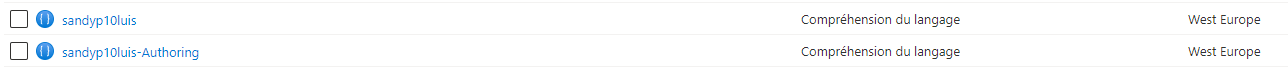

Deux ressources sont alors créées :

    - La ressource standard
    - La ressource Authoring.

# Préparation de l'espace de travail

Nous ajoutons les bibliothèques de client au fichier Python.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from collections import defaultdict

In [1]:
from azure.cognitiveservices.language.luis.authoring import LUISAuthoringClient
from azure.cognitiveservices.language.luis.authoring.models import ApplicationCreateObject
from azure.cognitiveservices.language.luis.runtime import LUISRuntimeClient
from msrest.authentication import CognitiveServicesCredentials

import json, time, uuid, urllib, zipfile, os

from my_luis import *  # Importe les fonctions personnalisées du projet LUIS

Ressources pour la suite du notebook : 
    
- https://docs.microsoft.com/fr-fr/azure/cognitive-services/luis/client-libraries-rest-api?tabs=windows&pivots=programming-language-python

# Authentification du client

Nous créons des variables pour stocker notre clé de création et les noms de nos ressources.

In [6]:
load_dotenv('api.env')

authoringKey = os.environ["LUIS_AUTHORING_SUBSCRIPTION_KEY"]
authoringEndpoint = os.environ["LUIS_AUTHORING_ENDPOINT"]

Nous créons un objet CognitiveServicesCredentials avec notre clé authoring et notre point de terminaison authoring pour créer un objet LUISAuthoringClient.

In [7]:
client = LUISAuthoringClient(authoringEndpoint,
                             CognitiveServicesCredentials(authoringKey))

# Création de l'application LUIS

Une application LUIS stocke le modèle de traitement en langage naturel contenant les intentions, les entités et les exemples d'énoncés.

Nous créons des variables pour stocker le nom de notre application et sa version.

In [8]:
# Utilisation de UUID pour éviter les collisions de nom d'application. (https://docs.python.org/3/library/uuid.html)
appName = "MyAppName" + str(uuid.uuid4())
versionId = "0.1"

Nous créons une méthode add pour l’objet AppsOperation afin de créer l’application. ( Attention : le nom et la culture de la langue sont des propriétés obligatoires.)

In [9]:
# Définition de l'application LUIS
appDefinition = ApplicationCreateObject(name=appName,
                                        initial_version_id=versionId,
                                        culture='en-us')

# Création de l'application LUIS
app_id = client.apps.add(appDefinition)

# Récupération de l'ID de l'application LUIS
print("Created LUIS app with ID {}".format(app_id))

Created LUIS app with ID e819b707-23e5-442c-83ad-c23297acb437


Nous pouvons récupérer des informations de notre application grâce à client.apps.get(app_id).

In [10]:
information = client.apps.get(app_id)
app_version = information.active_version
app_name = information.name

In [13]:
app_name

'BookmeFlyme5b56747c-2443-4a0c-89d2-9f442c3c944d'

# Chargement des données

In [14]:
url_oc = "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+10%C2%A0-+D%C3%A9veloppez+un+chatbot+pour+r%C3%A9server+des+vacances/frames.zip"
nom_fichier = "frames.json"

In [16]:
frames = load_and_transform(url_oc, nom_fichier, chemin_fichier)

Le téléchargement de vos données a commencé.
Le téléchargement des données est terminé.


In [17]:
frames[0]

{'user_id': 'U22HTHYNP',
 'turns': [{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
   'labels': {'acts': [{'args': [{'val': 'book', 'key': 'intent'}],
      'name': 'inform'},
     {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
       {'val': 'Caprica', 'key': 'or_city'},
       {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
       {'val': '8', 'key': 'n_adults'},
       {'val': '1700', 'key': 'budget'}],
      'name': 'inform'}],
    'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
      'name': 'inform'},
     {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
       {'val': 'Caprica', 'key': 'or_city'},
       {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
       {'val': '8', 'key': 'n_adults'},
       {'val': '1700', 'key': 'budget'}],
      'name': 'inform'}],
    'active_frame': 1,
    'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
 

# Transformation des données

In [20]:
liste_entites = ['dst_city', 'or_city', 'str_date', 'end_date', 'budget']
frames_luis = format_luis_frames(frames, "book", liste_entites)

Regardons à quoi ressemble une entrée pour notre modèle.

In [21]:
print(json.dumps(frames_luis[0], indent=2))

{
  "text": "i'd like to book a trip to atlantis from caprica on saturday, august 13, 2016 for 8 adults. i have a tight budget of 1700.",
  "intent_name": "book",
  "entity_labels": [
    {
      "entity_name": "dst_city",
      "start_char_index": 27,
      "end_char_index": 34
    },
    {
      "entity_name": "or_city",
      "start_char_index": 41,
      "end_char_index": 47
    },
    {
      "entity_name": "str_date",
      "start_char_index": 52,
      "end_char_index": 76
    },
    {
      "entity_name": "budget",
      "start_char_index": 117,
      "end_char_index": 120
    }
  ]
}


In [22]:
frames_luis

[{'text': "i'd like to book a trip to atlantis from caprica on saturday, august 13, 2016 for 8 adults. i have a tight budget of 1700.",
  'intent_name': 'book',
  'entity_labels': [{'entity_name': 'dst_city',
    'start_char_index': 27,
    'end_char_index': 34},
   {'entity_name': 'or_city', 'start_char_index': 41, 'end_char_index': 47},
   {'entity_name': 'str_date', 'start_char_index': 52, 'end_char_index': 76},
   {'entity_name': 'budget', 'start_char_index': 117, 'end_char_index': 120}]},
 {'text': 'yes, how about going to neverland from caprica on august 13, 2016 for 5 adults. for this trip, my budget would be 1900.',
  'intent_name': 'None',
  'entity_labels': [{'entity_name': 'dst_city',
    'start_char_index': 24,
    'end_char_index': 32},
   {'entity_name': 'budget', 'start_char_index': 114, 'end_char_index': 117},
   {'entity_name': 'or_city', 'start_char_index': 39, 'end_char_index': 45},
   {'entity_name': 'str_date', 'start_char_index': 50, 'end_char_index': 64}]},
 {'te

# Création des entités

In [23]:
liste_entites

['dst_city', 'or_city', 'str_date', 'end_date', 'budget']

In [24]:
for entite in liste_entites:
    client.model.add_entity(app_id, app_version, name=entite)

# Création de l'intention pour l'application

Nous créons une variable pour stocker l'intention de notre application.

In [25]:
intentName = "book"

L’objet principal dans un modèle d’application LUIS est l’intention. L’intention s’aligne sur un regroupement d’intentions d’énoncés utilisateur. Dans notre projet, l'intention est de réserver un billet d'avion.

Nous utilisons la méthode model.add_intent avec le nom de l’intention unique.
Nous transmettons l’ID de l’application, l’ID de version et le nom de la nouvelle intention.

In [26]:
client.model.add_intent(app_id, app_version, intentName)

'7cd4cecf-37da-4e37-8f92-548b001a3028'

# Entraînement du modèle

## Découpage set entrainement / set test

In [27]:
frames_luis[0]

{'text': "i'd like to book a trip to atlantis from caprica on saturday, august 13, 2016 for 8 adults. i have a tight budget of 1700.",
 'intent_name': 'book',
 'entity_labels': [{'entity_name': 'dst_city',
   'start_char_index': 27,
   'end_char_index': 34},
  {'entity_name': 'or_city', 'start_char_index': 41, 'end_char_index': 47},
  {'entity_name': 'str_date', 'start_char_index': 52, 'end_char_index': 76},
  {'entity_name': 'budget', 'start_char_index': 117, 'end_char_index': 120}]}

In [28]:
train_data = frames_luis[:-999]
test_data = frames_luis[-999:]

In [29]:
len(frames_luis)

10407

Attention !!!
Les noms acceptés sont :

    - text
    - intent_name
    - entity_labels
    - entity_labels
    - start_char_index
    - end_char_index

## Chargement des phrases d'exemples et entraînement de l'application

In [30]:
for i in range(0, len(train_data), 100):
    j = (i + 100)
    if j > len(frames_luis):
        j = len(frames_luis)

    # On ajoute 100 par 100 car les requêtes sont bloqué au dela de 100
    client.examples.batch(app_id, app_version, train_data[i:j])

In [31]:
client.train.train_version(app_id, versionId)
waiting = True
while waiting:
    info = client.train.get_status(app_id, versionId)

    # get_status returns a list of training statuses, one for each model. Loop through them and make sure all are done.
    waiting = any(
        map(
            lambda x: 'Queued' == x.details.status or 'InProgress' == x.details
            .status, info))
    if waiting:
        print("Waiting 10 seconds for training to complete...")
        time.sleep(10)
    else:
        print("trained")
        waiting = False

Waiting 10 seconds for training to complete...
Waiting 10 seconds for training to complete...
Waiting 10 seconds for training to complete...
Waiting 10 seconds for training to complete...
trained


In [32]:
# Mark the app as public so we can query it using any prediction endpoint.
# Note: For production scenarios, you should instead assign the app to your own LUIS prediction endpoint. See:
# https://docs.microsoft.com/en-gb/azure/cognitive-services/luis/luis-how-to-azure-subscription#assign-a-resource-to-an-app
client.apps.update_settings(app_id, is_public=True)

In [33]:
client.apps.publish(app_id, app_version, is_staging=False)

## Récupération du point de terminaison

In [34]:
responseEndpointInfo = client.apps.publish(app_id,
                                           app_version,
                                           is_staging=False)

In [35]:
responseEndpointInfo

In [36]:
endpoint = responseEndpointInfo.endpoint_url + \
"?subscription-key=" + authoringKey + "&q="
print(
    "Your app is published. You can now go to test it on\n{}".format(endpoint))

Your app is published. You can now go to test it on
https://westeurope.api.cognitive.microsoft.com/luis/v2.0/apps/e819b707-23e5-442c-83ad-c23297acb437?subscription-key=b0cc19fe552b4eec9392a1da8234835e&q=


In [37]:
responseEndpointInfo.endpoint_url

'https://westeurope.api.cognitive.microsoft.com/luis/v2.0/apps/e819b707-23e5-442c-83ad-c23297acb437'

sources pour l'entrainement et la publication de l'application :
    
    https://github.com/Azure-Samples/cognitive-services-python-sdk-samples/blob/master/samples/language/luis/luis_authoring_samples.py

# Test du modèle

In [38]:
PREDICTION_KEY = os.environ["PREDICTION_KEY"]
PREDICTION_ENDPOINT = os.environ["PREDICTION_ENDPOINT"]

In [39]:
clientRuntime = LUISRuntimeClient(
    PREDICTION_ENDPOINT,
    CognitiveServicesCredentials(PREDICTION_KEY),
)

## Test pour une phrase

In [40]:
test_data

[{'text': "heard kobe is nice. maybe i'll have better luck there..",
  'intent_name': 'None',
  'entity_labels': [{'entity_name': 'dst_city',
    'start_char_index': 6,
    'end_char_index': 9}]},
 {'text': "the hotel's nice right?",
  'intent_name': 'None',
  'entity_labels': []},
 {'text': "i'll go!", 'intent_name': 'book', 'entity_labels': []},
 {'text': 'when does that one leave?',
  'intent_name': 'None',
  'entity_labels': []},
 {'text': 'no. i need to get out before that!',
  'intent_name': 'None',
  'entity_labels': [{'entity_name': 'str_date',
    'start_char_index': 22,
    'end_char_index': 27}]},
 {'text': "i'll take the one leaving today pls",
  'intent_name': 'book',
  'entity_labels': [{'entity_name': 'str_date',
    'start_char_index': 26,
    'end_char_index': 30}]},
 {'text': 'thanks, friend', 'intent_name': 'None', 'entity_labels': []},
 {'text': 'i want to go on a vacation from munich.',
  'intent_name': 'book',
  'entity_labels': [{'entity_name': 'or_city',
    'st

In [41]:
request = {
    "query":
    "hey there, i'd love a trip from recife to barcelona please, can you help  me?"
}

In [42]:
result = clientRuntime.prediction.get_slot_prediction(
    app_id=app_id, slot_name="production", prediction_request=request)

In [43]:
result.prediction.entities

{'or_city': ['recife'], 'dst_city': ['barcelona']}

In [44]:
result.prediction.top_intent

'book'

In [45]:
result.prediction.intents

{'book': <azure.cognitiveservices.language.luis.runtime.models._models_py3.Intent at 0x2d79460b1f0>}

## Evaluation avec le jeu de données test

### Capacité du modèle à prédire la bonne intention

In [46]:
test_data[0]

{'text': "heard kobe is nice. maybe i'll have better luck there..",
 'intent_name': 'None',
 'entity_labels': [{'entity_name': 'dst_city',
   'start_char_index': 6,
   'end_char_index': 9}]}

In [47]:
len(test_data)

999

In [49]:
df_intention = df_prediction_intention(test_data)
df_intention

,Texte,Intention Cible,Intention Prediction
0,heard kobe is nice. maybe i'll have better luc...,None,None
1,the hotel's nice right?,None,None
2,i'll go!,book,None
3,when does that one leave?,None,None
4,no. i need to get out before that!,None,book
...,...,...,...
994,"5 adults and 7 kids! yup, the lot of us. we wa...",None,None
995,oh yes! between september 12 and 26!,None,None
996,"that sounds amazing, and it's within those dat...",None,None
997,"ok perfect, book me!",book,book


Accuracy = 0.89
Recall = 0.66
Precision = 0.74


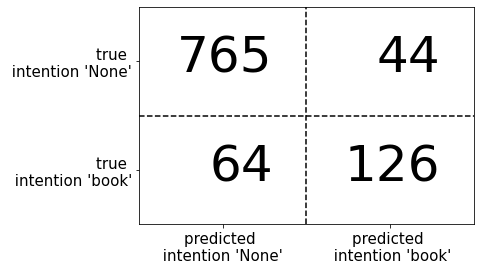

In [52]:
matrice_confusion_intention(df_intention)

### Capacité du modèle à prédire les bonnes entités

In [53]:
test_data

[{'text': "heard kobe is nice. maybe i'll have better luck there..",
  'intent_name': 'None',
  'entity_labels': [{'entity_name': 'dst_city',
    'start_char_index': 6,
    'end_char_index': 9}]},
 {'text': "the hotel's nice right?",
  'intent_name': 'None',
  'entity_labels': []},
 {'text': "i'll go!", 'intent_name': 'book', 'entity_labels': []},
 {'text': 'when does that one leave?',
  'intent_name': 'None',
  'entity_labels': []},
 {'text': 'no. i need to get out before that!',
  'intent_name': 'None',
  'entity_labels': [{'entity_name': 'str_date',
    'start_char_index': 22,
    'end_char_index': 27}]},
 {'text': "i'll take the one leaving today pls",
  'intent_name': 'book',
  'entity_labels': [{'entity_name': 'str_date',
    'start_char_index': 26,
    'end_char_index': 30}]},
 {'text': 'thanks, friend', 'intent_name': 'None', 'entity_labels': []},
 {'text': 'i want to go on a vacation from munich.',
  'intent_name': 'book',
  'entity_labels': [{'entity_name': 'or_city',
    'st

In [54]:
request = {
    "query":
    "hey there, i'd love a trip from recife to barcelona please, can you help  me?"
}

In [55]:
result = clientRuntime.prediction.get_slot_prediction(
    app_id=app_id, slot_name="production", prediction_request=request)

In [56]:
result.prediction.entities

{'or_city': ['recife'], 'dst_city': ['barcelona']}

In [58]:
for i in range(20):
    df = df_prediction_entites_un_texte(i, print_reponse='oui')
    df

La précision de la prédiction sur les entités est de 1.0 
pour le texte : heard kobe is nice. maybe i'll have better luck there..
-------------------------------------------------------------
Il n'y a pas d'entité cible pour le texte: the hotel's nice right?
-------------------------------------------------------------
Il n'y a pas d'entité cible pour le texte: i'll go!
-------------------------------------------------------------
Il n'y a pas d'entité cible pour le texte: when does that one leave?
-------------------------------------------------------------
La précision de la prédiction sur les entités est de 0.0 
pour le texte : no. i need to get out before that!
-------------------------------------------------------------
La précision de la prédiction sur les entités est de 1.0 
pour le texte : i'll take the one leaving today pls
-------------------------------------------------------------
Il n'y a pas d'entité cible pour le texte: thanks, friend
---------------------------------

In [60]:
df = df_precision_entites(test_data)
df

La précision de la prédiction sur les entités est de 0.88


,Entités_cible,Valeurs_cible,Valeurs_prediction
0,dst_city,kobe,kobe
1,str_date,before,e
2,str_date,today,today
3,or_city,munich,munich
4,str_date,monday,monday
...,...,...,...
671,str_date,september 12th,e
672,or_city,tampa,tampa
673,budget,32800,32800
674,str_date,september 12,september 12


La précision de la prédiction sur les entités est de 0.88
La précision sur la prédiction des intentions est: 0.89 
La précision sur la prédiction des entités est: 0.88


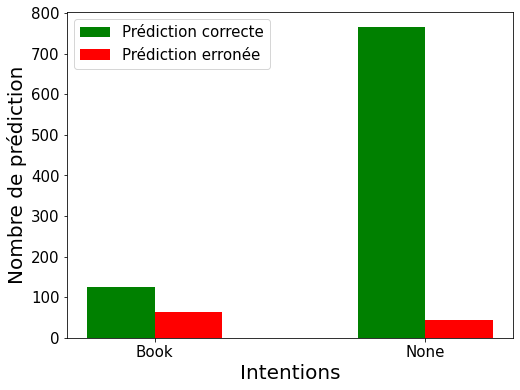

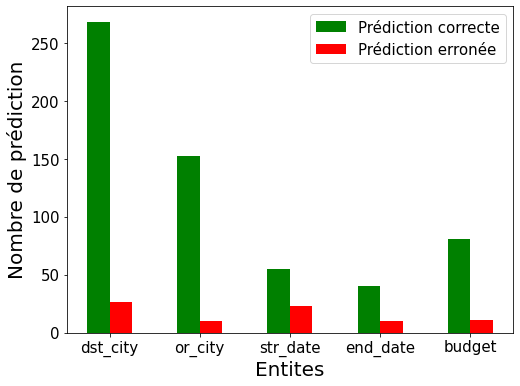

In [63]:
df_intention, df_entites = visualisation(test_data)